In [5]:
%pip install Basemap

  Obtaining dependency information for Basemap from https://files.pythonhosted.org/packages/69/ee/9f74f26d84874c2ff057c8a14d2b7e0010545775e9531d22eba610b295bc/basemap-1.4.1-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for basemap-data<1.4,>=1.3.2 from https://files.pythonhosted.org/packages/2c/c3/63fdb885308c999206c7a497d79a50891581626da7dc491d432d2732bb46/basemap_data-1.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyshp<2.4,>=1.2 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.0 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib<3.9,>=1.5 from https://files.pythonhosted.org/packages/d5/88/83aee628339486de57fcc8c1387e28de816182edcfc42928cff02c364664/matplotlib-3.8.4-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pyp

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


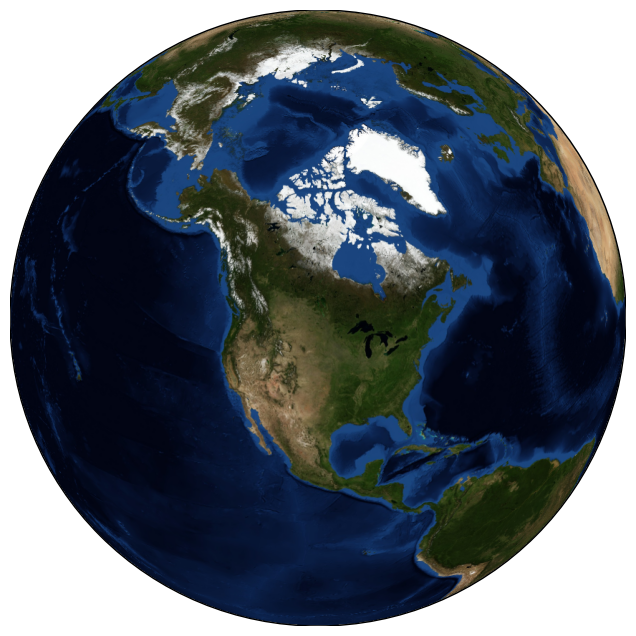

In [7]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


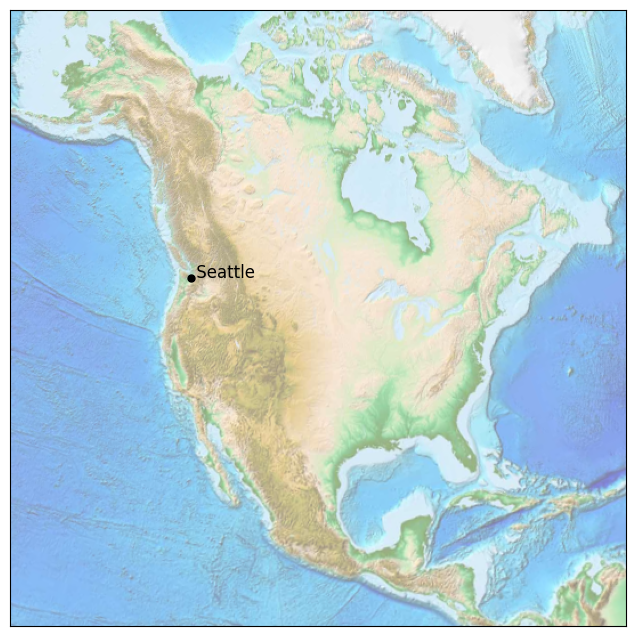

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [9]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

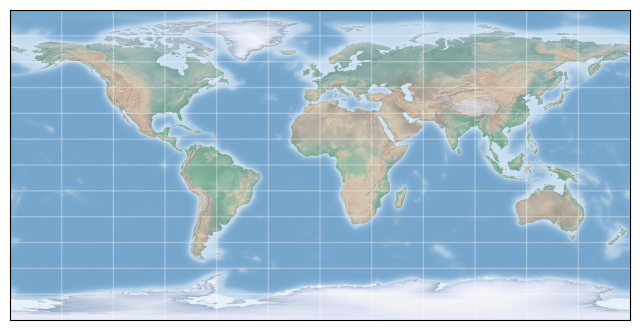

In [10]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

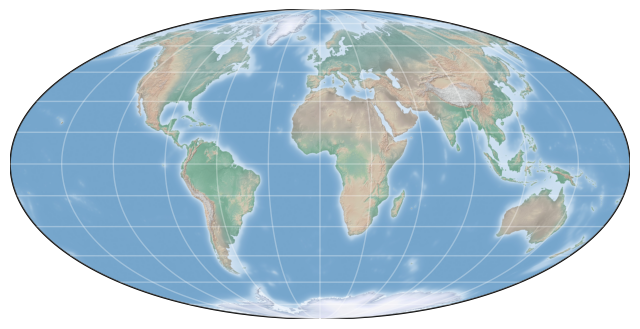

In [11]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

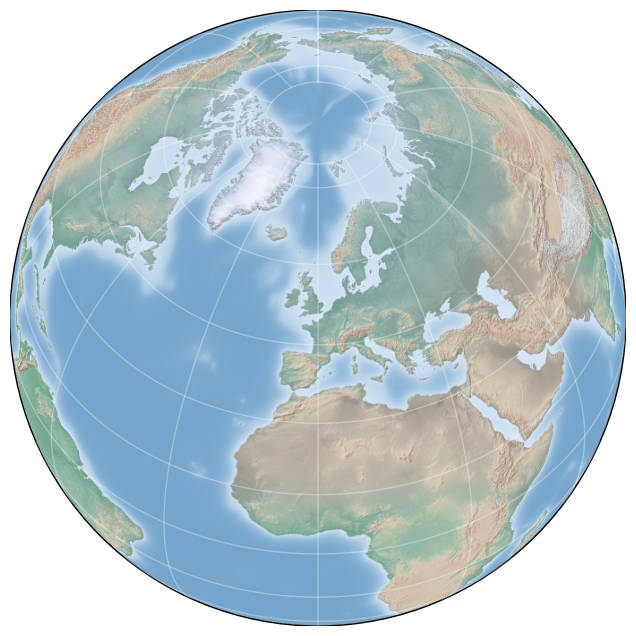

In [12]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

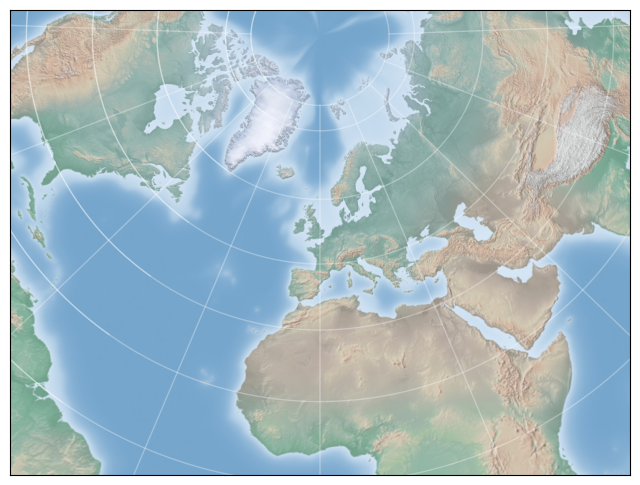

In [13]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

OSError: Unable to open boundary dataset file. Only the 'crude', 'low' and 'intermediate' resolution datasets are installed by default. If you are requesting a 'high' or 'full' resolution dataset, you need to install the `basemap-data-hires` package

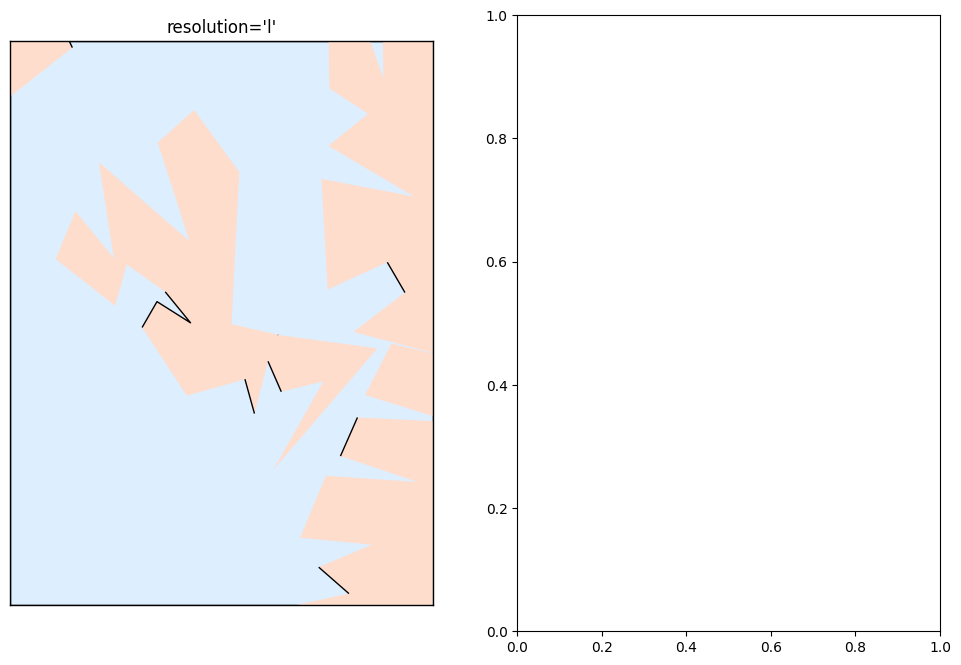

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [19]:
#
# !gunzip gistemp250.nc.gz

In [20]:
from netCDF4 import Dataset
data = Dataset('gistemp250.nc')

ModuleNotFoundError: No module named 'netCDF4'

In [14]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

In [15]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

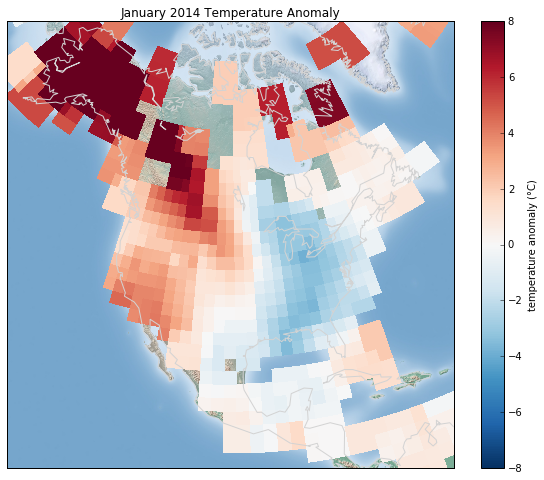

In [16]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');